In [1]:
import matplotlib.pyplot as plt 
import os
import json
import urllib
import pylab as pl 
import pandas as pd
import numpy as np 
import geopandas as gpd
import json
import requests
import zipfile
import io 
import shapely
import shutil
from fiona.crs import from_epsg
import seaborn as sns
import scipy as sp 
from scipy import stats

%pylab inline

try:
    import urllib2 as urllib
except ImportError:
    import urllib.request as urllib

Populating the interactive namespace from numpy and matplotlib


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
### Download of NYCHA housing polygons shapefile

url = 'https://data.cityofnewyork.us/api/geospatial/i9rv-hdr5?method=export&format=Shapefile'

print("PUIdata", os.getenv("PUIDATA"))

print('Downloading shapefile...')
r = requests.get(url)
z = zipfile.ZipFile(io.BytesIO(r.content))
print("Done")

z.extractall(path='/nfshome/mbh329/PUIdata/')

filenames = [y for y in sorted(z.namelist()) for ending in ['dbf', 'prj', 'shp', 'shx'] if y.endswith(ending)] 
print(filenames)

PUIdata /nfshome/mbh329/PUIdata
Done
['geo_export_d69a900b-7d2a-4c62-825d-9a74ca901aad.dbf', 'geo_export_d69a900b-7d2a-4c62-825d-9a74ca901aad.prj', 'geo_export_d69a900b-7d2a-4c62-825d-9a74ca901aad.shp', 'geo_export_d69a900b-7d2a-4c62-825d-9a74ca901aad.shx']


In [3]:
nychaloc = gpd.read_file('/nfshome/mbh329/PUIdata/nychahousing.shp')

In [4]:
nychaloc

,borough,developmen,tds_num,geometry
0,VARIOUS,FHA REPOSSESSED HOUSES (GROUP III),213,(POLYGON ((-73.93559146071932 40.6594891659253...
1,VARIOUS,FHA REPOSSESSED HOUSES (GROUP IV),226,(POLYGON ((-73.92913654009605 40.6620874071209...
2,VARIOUS,FHA REPOSSESSED HOUSES (GROUP VII),274,(POLYGON ((-73.76955112561133 40.6615154004818...
3,VARIOUS,FHA REPOSSESSED HOUSES (GROUP VIII),275,(POLYGON ((-73.7935323517346 40.67461675600666...
4,VARIOUS,FHA REPOSSESSED HOUSES (GROUP V),260,(POLYGON ((-73.92285468610142 40.6560250263966...
5,VARIOUS,FHA REPOSSESSED HOUSES (GROUP VI),273,(POLYGON ((-73.77437108469491 40.6637481196787...
6,BRONX,RANDALL AVENUE-BALCOM AVENUE,245,POLYGON ((-73.82755659654781 40.82154582831085...
7,STATEN ISLAND,NEW LANE AREA,314,POLYGON ((-74.06069977692904 40.61306453835194...
8,VARIOUS,FHA REPOSSESSED HOUSES (GROUP IX),283,(POLYGON ((-73.92782507256469 40.6609065142092...
9,VARIOUS,FHA REPOSSESSED HOUSES (GROUP X),284,(POLYGON ((-73.7889041552052 40.59074846538255...


In [5]:
nychaman = nychaloc[nychaloc["borough"]== "MANHATTAN"] #selecting only manhattan

In [6]:
nychaman

,borough,developmen,tds_num,geometry
10,MANHATTAN,PUBLIC SCHOOL 139 (CONVERSION),340,POLYGON ((-73.94050488318011 40.81768597199684...
17,MANHATTAN,REHAB PROGRAM (DOUGLASS REHABS),515,(POLYGON ((-73.9687317622431 40.79991047503207...
18,MANHATTAN,REHAB PROGRAM (WISE REHAB),517,"POLYGON ((-73.9676785139458 40.79079649351923,..."
20,MANHATTAN,RIIS,018,(POLYGON ((-73.97238164268212 40.7260688000260...
21,MANHATTAN,RIIS II,019,POLYGON ((-73.97584054322758 40.72371724699431...
22,MANHATTAN,ROBBINS PLAZA,218,POLYGON ((-73.95744671660006 40.76681479020332...
23,MANHATTAN,ROBINSON,241,POLYGON ((-73.93703084220449 40.80698005153805...
27,MANHATTAN,RUTGERS,099,POLYGON ((-73.99030053236753 40.71125986956459...
33,MANHATTAN,SAMUEL (CITY),377,(POLYGON ((-73.93908471289893 40.8203535586144...
34,MANHATTAN,SAMUEL (MHOP) I,389,(POLYGON ((-73.94071899966191 40.8183847669019...


In [7]:
comdis = gpd.read_file('/nfshome/mbh329/PUIdata/communitydistrictsnyc.shp') 

#community districts shapefile from puidata

In [8]:
comdis


,boro_cd,shape_area,shape_leng,geometry
0,311.0,1.031778e+08,51549.557899,POLYGON ((-73.97299433938896 40.60881414180224...
1,313.0,8.819569e+07,65821.875617,POLYGON ((-73.98372152615246 40.59582107821707...
2,312.0,9.952550e+07,52245.830495,POLYGON ((-73.97139631688152 40.64825778611409...
3,304.0,5.666322e+07,37008.100320,POLYGON ((-73.89646625062909 40.68233642247531...
4,209.0,1.142663e+08,62239.831909,"POLYGON ((-73.83979488496 40.8356192074919, -7..."
5,206.0,4.266431e+07,35875.710994,"POLYGON ((-73.8718461029101 40.84376077785579,..."
6,208.0,9.207172e+07,47817.455397,POLYGON ((-73.89663333863315 40.91141737484628...
7,212.0,1.548966e+08,83998.355422,POLYGON ((-73.79385527209071 40.88364331133348...
8,226.0,5.056641e+07,32820.398590,POLYGON ((-73.86789798628736 40.90294017690526...
9,317.0,9.381021e+07,43326.850619,POLYGON ((-73.90755209573506 40.65118592573071...


In [9]:
comdis['boro_cd'] = comdis['boro_cd'].astype(int) #switch float to interger

In [10]:
comdis1 = [101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112]

comdis_man = comdis[comdis['boro_cd'].apply(lambda x: x in comdis1)] 

In [11]:
comdis_man #boro_cd is the community district number +1__

,boro_cd,shape_area,shape_leng,geometry
29,105,4.379030e+07,35288.305061,POLYGON ((-73.97301487176121 40.76427887944521...
39,101,4.267503e+07,73785.483824,(POLYGON ((-74.0438776163991 40.69018767537123...
48,110,3.908463e+07,35825.290700,POLYGON ((-73.93445239397371 40.83598096014986...
51,111,6.614601e+07,59502.909391,(POLYGON ((-73.92133752419279 40.8008521075021...
53,112,7.796661e+07,56219.763159,POLYGON ((-73.93445239397371 40.83598096014986...
56,103,4.687970e+07,30468.340658,POLYGON ((-73.98877931684075 40.73396539973847...
57,102,3.772316e+07,34902.880915,"POLYGON ((-73.9968399392649 40.7373608893982, ..."
58,104,4.929234e+07,67941.137396,POLYGON ((-73.99393694248319 40.77317951096692...
60,107,5.315282e+07,39863.701384,POLYGON ((-73.95964685423152 40.80115642325645...
61,109,4.189218e+07,34959.184938,POLYGON ((-73.94014131210091 40.83037198888071...


In [12]:
### making sure all gpd are in the correct projection

comdis_man.to_crs(epsg=4326)

nychaman.to_crs(epsg=4326)


# boros.to_crs(epsg=2263)

,borough,developmen,tds_num,geometry
10,MANHATTAN,PUBLIC SCHOOL 139 (CONVERSION),340,POLYGON ((-73.94050488318011 40.81768597199684...
17,MANHATTAN,REHAB PROGRAM (DOUGLASS REHABS),515,(POLYGON ((-73.9687317622431 40.79991047503207...
18,MANHATTAN,REHAB PROGRAM (WISE REHAB),517,"POLYGON ((-73.9676785139458 40.79079649351923,..."
20,MANHATTAN,RIIS,018,(POLYGON ((-73.97238164268212 40.7260688000260...
21,MANHATTAN,RIIS II,019,POLYGON ((-73.97584054322758 40.72371724699431...
22,MANHATTAN,ROBBINS PLAZA,218,POLYGON ((-73.95744671660006 40.76681479020332...
23,MANHATTAN,ROBINSON,241,POLYGON ((-73.93703084220449 40.80698005153805...
27,MANHATTAN,RUTGERS,099,POLYGON ((-73.99030053236753 40.71125986956459...
33,MANHATTAN,SAMUEL (CITY),377,(POLYGON ((-73.93908471289893 40.8203535586144...
34,MANHATTAN,SAMUEL (MHOP) I,389,(POLYGON ((-73.94071899966191 40.8183847669019...


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/geopandas/plotting.py:389: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  "'color'.", UserWarning)
/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


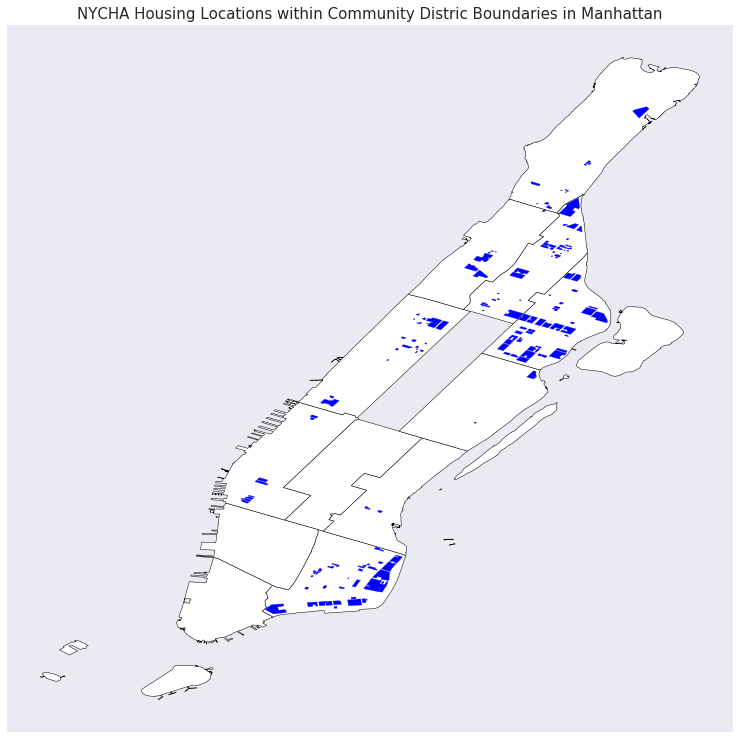

In [13]:
fig, ax = plt.subplots(figsize  = (13, 13))

ax.set_title("NYCHA Housing Locations within Community Distric Boundaries in Manhattan", fontsize=15)

ax.get_xaxis().set_visible(False) #takes away axis from the map x,y axis relates to Lat, Long 
ax.get_yaxis().set_visible(False) #latitude

#man.plot(color="white", alpha=1, edgecolor='black', ax=ax)
#manhattan boro plot

#boros.plot(color="white", alpha=1, edgecolor="black", ax=ax)
#all 5 boros

comdis_man.plot(column='boro_cd', color="white", alpha=1, edgecolor="black", legend=True, k=9, lw=.5, ax=ax)
#council districts

nychaman.plot(color="blue", alpha=1, edgecolor="blue", ax=ax)
#nycha housing





In [14]:
nychaman['geometry'].to_crs({'init': 'epsg:3395'})\
               .map(lambda p: p.area)


10      10040.627499
17       3867.901240
18       1648.952468
20      81097.759044
21      41230.403959
22       1997.777926
23       9833.935825
27      35670.816049
33      32173.974305
34       2169.342232
35        468.911280
36        914.536649
38      14401.386508
41     127136.536211
44        776.689491
48       7185.875644
51       1430.015825
57      83378.043400
65       5051.140642
77      12711.540034
78       7139.305892
86      37381.174042
94       5093.956466
99       5345.994762
100      3842.529205
101     81735.131455
102     57859.306121
103     48295.390286
104     90423.884712
111     77183.491457
           ...      
237     69516.282785
238      6019.194129
245      3879.354441
248    185841.663460
249      3351.450224
266      9921.758770
271      6996.201453
272      4466.223561
280      5711.756257
288     13220.065724
292      9028.659190
293      3914.357310
294       655.918678
295      1357.750274
296      1398.441520
303     21099.212511
304     15371

In [15]:
nychaman['newarea'] = nychaman['geometry'].to_crs({'init': 'epsg:3395'})\
               .map(lambda p: p.area)

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [16]:
nychaman.head(5)

,borough,developmen,tds_num,geometry,newarea
10,MANHATTAN,PUBLIC SCHOOL 139 (CONVERSION),340,POLYGON ((-73.94050488318011 40.81768597199684...,10040.627499
17,MANHATTAN,REHAB PROGRAM (DOUGLASS REHABS),515,(POLYGON ((-73.9687317622431 40.79991047503207...,3867.901240
18,MANHATTAN,REHAB PROGRAM (WISE REHAB),517,"POLYGON ((-73.9676785139458 40.79079649351923,...",1648.952468
20,MANHATTAN,RIIS,018,(POLYGON ((-73.97238164268212 40.7260688000260...,81097.759044
21,MANHATTAN,RIIS II,019,POLYGON ((-73.97584054322758 40.72371724699431...,41230.403959


In [17]:
comdis_man

,boro_cd,shape_area,shape_leng,geometry
29,105,4.379030e+07,35288.305061,POLYGON ((-73.97301487176121 40.76427887944521...
39,101,4.267503e+07,73785.483824,(POLYGON ((-74.0438776163991 40.69018767537123...
48,110,3.908463e+07,35825.290700,POLYGON ((-73.93445239397371 40.83598096014986...
51,111,6.614601e+07,59502.909391,(POLYGON ((-73.92133752419279 40.8008521075021...
53,112,7.796661e+07,56219.763159,POLYGON ((-73.93445239397371 40.83598096014986...
56,103,4.687970e+07,30468.340658,POLYGON ((-73.98877931684075 40.73396539973847...
57,102,3.772316e+07,34902.880915,"POLYGON ((-73.9968399392649 40.7373608893982, ..."
58,104,4.929234e+07,67941.137396,POLYGON ((-73.99393694248319 40.77317951096692...
60,107,5.315282e+07,39863.701384,POLYGON ((-73.95964685423152 40.80115642325645...
61,109,4.189218e+07,34959.184938,POLYGON ((-73.94014131210091 40.83037198888071...


In [18]:
nychousing = gpd.sjoin(comdis_man, nychaman)

nychousing = nychousing.groupby('boro_cd')[['newarea']].sum()

nychousing.head()

,newarea
boro_cd,
103,913768.971369
104,105770.251613
106,14194.114737
107,274789.269127
108,47114.012426


In [29]:
percent_housing = comdis.merge(nychousing, left_on='boro_cd', right_index=True)

In [38]:


percent_housing['percentage NYCHA'] = percent_housing['newarea'] / percent_housing['shape_area'] * 100

In [39]:
percent_housing.head()

,boro_cd,shape_area,shape_leng,geometry,newarea,percentage NYCHA
48,110,3.908463e+07,35825.290700,POLYGON ((-73.93445239397371 40.83598096014986...,5.515995e+05,1.411295
51,111,6.614601e+07,59502.909391,(POLYGON ((-73.92133752419279 40.8008521075021...,1.015668e+06,1.535494
53,112,7.796661e+07,56219.763159,POLYGON ((-73.93445239397371 40.83598096014986...,1.412186e+05,0.181127
56,103,4.687970e+07,30468.340658,POLYGON ((-73.98877931684075 40.73396539973847...,9.137690e+05,1.949178
58,104,4.929234e+07,67941.137396,POLYGON ((-73.99393694248319 40.77317951096692...,1.057703e+05,0.214577


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/geopandas/plotting.py:389: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  "'color'.", UserWarning)
/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


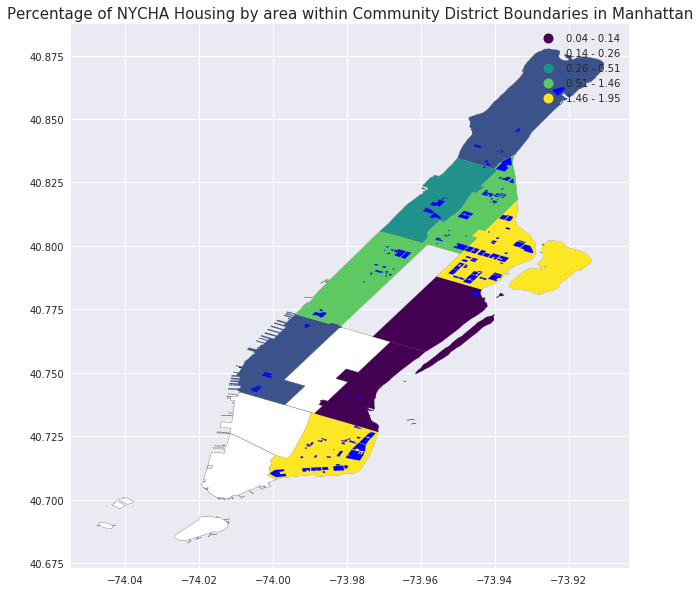

In [40]:

f, ax = plt.subplots(figsize=(10,10))

ax.set_title("Percentage of NYCHA Housing by area within \
Community District Boundaries in Manhattan", fontsize=15)

comdis_man.plot(column='boro_cd', color="white", alpha=1, edgecolor="black", lw=.2, ax=ax)
#council districts

percent_housing.plot(column='percentage NYCHA', cmap='viridis',alpha=1,linewidth=0.2,ax=ax,\
                scheme="Quantiles", legend=True)


nychaman.plot(color="blue", alpha=1, lw=.2, edgecolor="blue", ax=ax)

ax.get_xaxis().set_visible(True) #takes away axis from the map x,y axis relates to Lat, Long 
ax.get_yaxis().set_visible(True) #latitude

#ax.legend(nychousing, loc='upper left')

plt.show()

### Figure 1: This choropleth map shows the percentage (by area) of NYCHA owned property within Community Districts. The darker the color scheme, the higher percentage of NYCHA housing by area. Overlayed on top (in blue) is the location polygons of actual NYCHA property.

In [ ]:
nychousing


# comdis_man['geometry'].to_crs({'init': 'epsg:3395'})\
#               .map(lambda p: p.area)